In [1]:
import os

# 提取音频数据

In [4]:
import librosa

# 加载音频文件
audio_data, sr = librosa.load('data/f_mp3/新闻联播女声_37680.mp3')

# 进一步处理音频数据
# 例如，提取音频特征或进行其他分析


In [8]:
audio_data

array([-1.1368684e-13, -9.6633812e-13, -4.5474735e-13, ...,
        7.9885311e-04, -1.2114262e-02, -1.5443904e-02], dtype=float32)

# 绘制音轨图--wav

In [23]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

# 如果需要处理音频数据（例如归一化），可能还需要numpy
import numpy as np

# 读取音频文件的采样率和样本数据
sampling_freq, audio_data = wavfile.read('data/f_mp3/man-adam.wav')  

In [30]:
# 归一化音频数据到-1.0到1.0之间
if audio_data.dtype == 'int16':
    audio_data = audio_data / 32768.0  # 对于16位有符号整数类型的数据

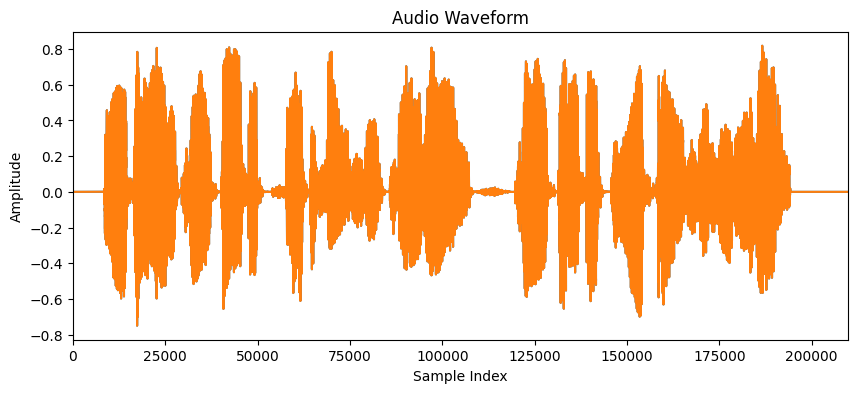

In [31]:
plt.figure(figsize=(10, 4))  # 设置图形大小
plt.plot(audio_data)  # 绘制原始波形
plt.title('Audio Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')  # 振幅
plt.xlim(0, len(audio_data))
plt.show()

# 将MP3转pcm

soundfile.read 函数是 soundfile 库中的一个核心功能，它用于从音频文件中读取音频数据并返回采样率（sampling rate）

- 打开和解码音频文件：sf.read('f.mp3') 会打开名为 'f.mp3' 的音频文件，并将其内容解码为PCM（Pulse Code Modulation）格式的原始音频信号。这意味着MP3等压缩格式的音频会被转换成未压缩、连续的数字音频样本序列。

- 读取音频数据：函数将音频文件的内容读入内存，并以numpy数组的形式返回。data 变量就包含了音频文件的所有采样点，其形状可能是一维（单声道音频）或二维（立体声或其他多声道音频）。

- 获取采样率：同时，该函数还返回音频文件的采样率，即每秒钟有多少个样本。这个信息对于后续处理音频信号以及播放音频至关重要，因为它定义了音频的时间分辨率。

In [47]:
import soundfile as sf

data, sampling_rate = sf.read('data/f_mp3/man-adam.wav')
# 然后按照上述wavfile的流程进行后续处理和绘图
time_axis = np.arange(len(data)) / sampling_rate

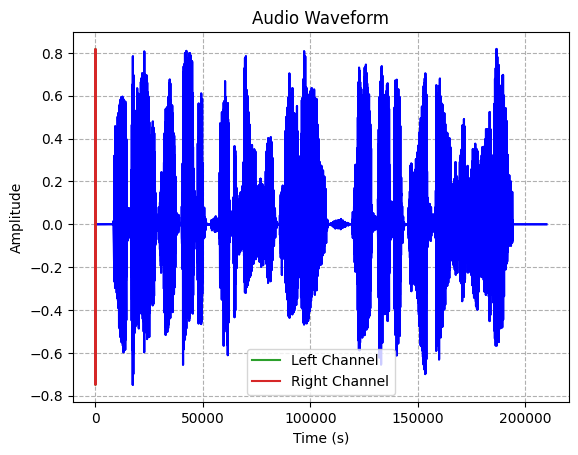

<Figure size 1000x400 with 0 Axes>

In [48]:
plt.plot(data, color='blue', linestyle='-')  # 设置为蓝色实线
plt.grid(True, which='both', axis='both', linestyle='--')  # 添加网格
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(time_axis, data[:, 0], label='Left Channel', color='tab:green')
plt.plot(time_axis, data[:, 1], label='Right Channel', color='tab:red')
plt.legend()
plt.figure(figsize=(10, 4))  # 调整图像大小
plt.tight_layout()  # 自动调整子图间距，避免重叠

# 绘制频谱图 色度图

C:\Users\87620\AppData\Local\Temp\ipykernel_21068\3806888599.py:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


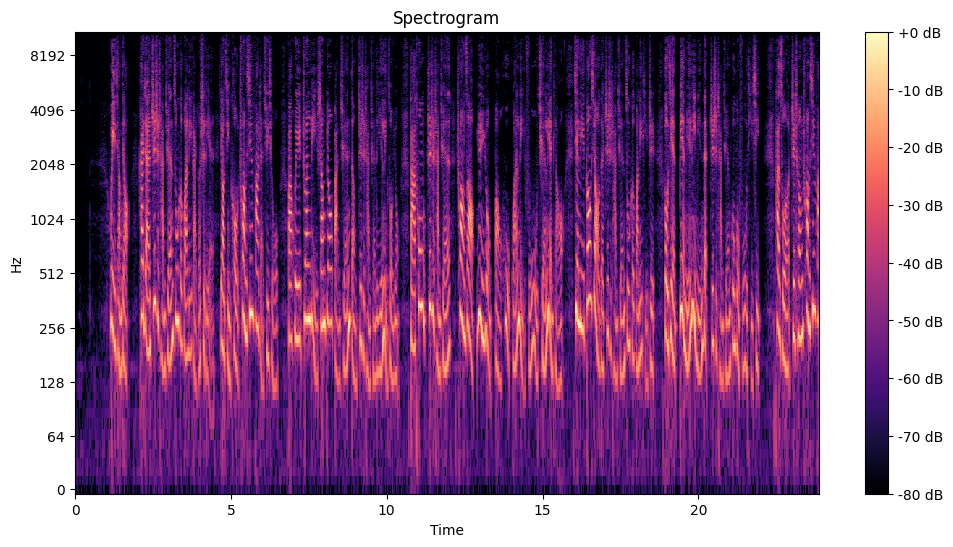

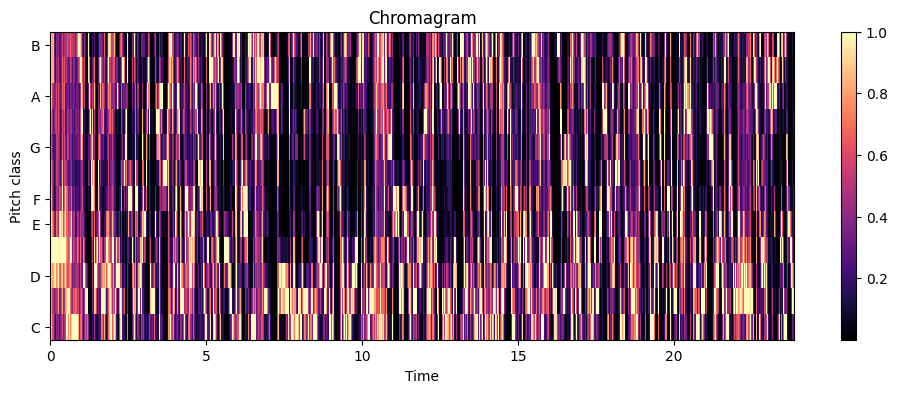

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 加载音频文件
audio_path = 'data/f_mp3/新闻联播女声_37680.mp3'
y, sr = librosa.load(audio_path)

# 绘制频谱图
plt.figure(figsize=(12, 6))
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)  # 将幅度转换为分贝
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')  # 以对数刻度绘制频谱图
plt.colorbar(format='%+2.0f dB')  # 显示颜色条
plt.title('Spectrogram')  # 设置标题  中文Spectrogram意思是频谱图
plt.show()

# 绘制色度图
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')  # 设置标题  中文Chromagram意思是色度图
plt.show()
# 频谱图和色度图的区别是什么？ 频谱图是频率和时间的图像，色度图是音符和时间的图像

# 梅尔频率倒谱系数（Mel-Frequency Cepstral Coefficients，MFCCs）
MFCCs是一种常用的音频特征，通常用于语音识别和音频分类。它可以通过对音频信号进行一系列处理得到一个向量矩阵。

In [2]:

import librosa
import numpy as np

# 加载音频文件
audio_data, sr = librosa.load('data/f_mp3/新闻联播女声_37680.mp3')

# 提取MFCCs特征
mfccs = librosa.feature.mfcc(y=audio_data, sr=sr)

# 打印MFCCs的形状
print("MFCCs shape:", mfccs.shape)



MFCCs shape: (20, 1028)


In [3]:
mfccs

array([[-6.1351410e+02, -6.1314789e+02, -6.0444006e+02, ...,
        -3.5684515e+02, -2.5593994e+02, -2.0857498e+02],
       [ 0.0000000e+00,  5.1751125e-01,  1.2781312e+01, ...,
         1.0694602e+02,  1.4724200e+02,  1.5917770e+02],
       [ 0.0000000e+00,  5.1607323e-01,  1.2628072e+01, ...,
        -2.1087440e+01, -6.0889244e+01, -6.3653404e+01],
       ...,
       [ 0.0000000e+00,  3.8872495e-01,  2.9405713e+00, ...,
        -5.2862105e+00, -7.7764549e+00, -8.8427296e+00],
       [ 0.0000000e+00,  3.7430373e-01,  2.2742510e+00, ...,
         3.1724470e+00,  7.8594360e+00,  1.8657303e+00],
       [ 0.0000000e+00,  3.5933638e-01,  1.6626544e+00, ...,
         5.4181414e+00,  3.4661436e+00, -6.1948222e-01]], dtype=float32)

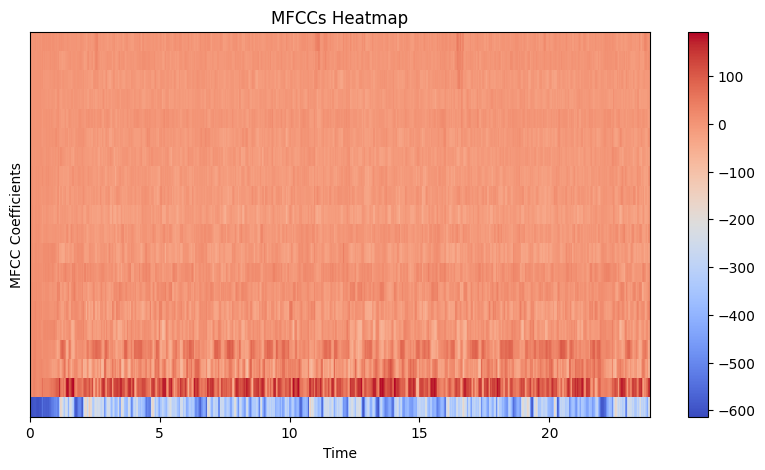

In [4]:
import librosa.display
import matplotlib.pyplot as plt

# 绘制MFCCs热图
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs Heatmap')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()
